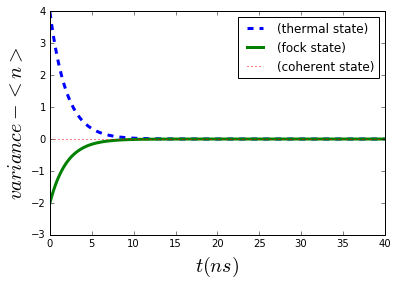

In [24]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N=25
a=destroy(N)
n_op = a.dag()*a
H=2*np.pi*a.dag()*a
kappa=0.25
n_th=0.0  # was 2.0
c_ops=[np.sqrt(kappa*(1+n_th))*a,np.sqrt(kappa*n_th)*a.dag()]
times=np.linspace(0,40,200)
rho01=thermal_dm(N,2)
rho02=fock_dm(N,2)
rho03=coherent_dm(N,np.sqrt(2))
n1=mesolve(H,rho01,times,c_ops,[a.dag()*a]).expect[0]
n2=mesolve(H,rho02,times,c_ops,[a.dag()*a]).expect[0]
n3=mesolve(H,rho03,times,c_ops,[a.dag()*a]).expect[0]
m1=mesolve(H,rho01,times,c_ops,[a.dag()*a.dag()*a*a]).expect[0]
m2=mesolve(H,rho02,times,c_ops,[a.dag()*a.dag()*a*a]).expect[0]
m3=mesolve(H,rho03,times,c_ops,[a.dag()*a.dag()*a*a]).expect[0]
plt.plot(times,np.real(m1-n1*n1),label='(a)',lw=3,ls='--')
plt.plot(times,np.real(m2-n2*n2),label='(b)',lw=3,ls='-')
plt.plot(times,np.real(m3-n3*n3),label='(c)',lw=1,ls=':')
plt.legend(['(thermal state)','(fock state)','(coherent state)'])
plt.xlabel(times,fontsize=20,fontweight='bold')
plt.xlabel(r'$t(ns)$',fontsize=20,fontweight='bold')
plt.ylabel(r'$variance - <n> $',fontsize=20,fontweight='bold')
plt.show()

In [4]:
from qutip import *
import numpy as np
import cmath

# Try to make a pi/2 pulse on a state ket |1> and see which axis it will be

# generating arbitrary qubit state
def gen_qubit_state(alpha, beta):
    return alpha*ket([1], dim=2) + beta*ket([0], dim=2)

imaginary_unit = cmath.sqrt(-1)
# getting the ket
#psi_0 = gen_qubit_state(1/np.sqrt(2), -1j*1/np.sqrt(2))
psi_0 = gen_qubit_state(0, 1)
# rabi frequency 
omega = 2*np.pi
# energy splitting of the system hamiltonian
w0 = 2*np.pi
# define Hamiltonian
def Ham2(t, args=None):
    return w0*sigmaz() + omega*np.sin(w0*t)*sigmax()

def H1_coeff(t, args):
    return np.sin(w0*t)
H0 = w0*sigmaz()
H1 = omega*sigmax()
Ham3 = [H0,[H1,H1_coeff]]

time = np.linspace(0,0.5,100)

eval_operators = [sigmax(),sigmay(),sigmaz()]
Ham1 = w0*sigmaz()
#exp_list = sesolve(Ham1, psi_0, time, eval_operators)
exp_list2 = mesolve(Ham2, psi_0, time, [], eval_operators)
#exp_list3 = mesolve(Ham3, coherent(2,1), time, sigmaz(), eval_operators)

In [5]:
exp_list2.expect

[array([  0.00000000e+00,   2.12969205e-05,   1.70255094e-04,
          5.73889335e-04,   1.35791917e-03,   2.64610842e-03,
          4.55959179e-03,   7.21618193e-03,   1.07296573e-02,
          1.52090289e-02,   2.07577765e-02,   2.74730679e-02,
          3.54449542e-02,   4.47555468e-02,   5.54781815e-02,
          6.76765750e-02,   8.14039835e-02,   9.67023718e-02,
          1.13601605e-01,   1.32118677e-01,   1.52256983e-01,
          1.74005667e-01,   1.97339039e-01,   2.22216091e-01,
          2.48580138e-01,   2.76358569e-01,   3.05462765e-01,
          3.35788158e-01,   3.67214478e-01,   3.99606174e-01,
          4.32813036e-01,   4.66671005e-01,   5.01003195e-01,
          5.35621104e-01,   5.70326025e-01,   6.04910639e-01,
          6.39160784e-01,   6.72857369e-01,   7.05778434e-01,
          7.37701306e-01,   7.68404847e-01,   7.97671738e-01,
          8.25290796e-01,   8.51059254e-01,   8.74785002e-01,
          8.96288729e-01,   9.15405943e-01,   9.31988834e-01,
        

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

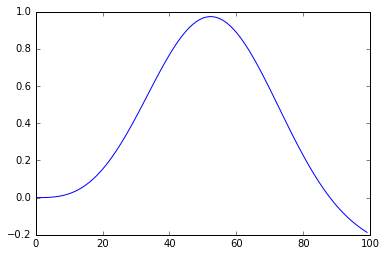

In [9]:
plt.plot(exp_list2.expect[0])